In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart_disease_uci.csv',sep = ',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
for i in range(16):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])

In [10]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0,29,1,0,3,31,65,1,0,50,0,22,0,0,0,0
1,1,33,1,0,0,40,112,0,0,11,1,15,1,3,1,2
2,2,33,1,0,0,14,61,0,0,30,1,25,1,2,2,1
3,3,3,1,0,2,22,81,0,1,85,0,32,0,0,1,0
4,4,7,0,0,1,22,36,0,0,72,0,14,2,0,1,0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

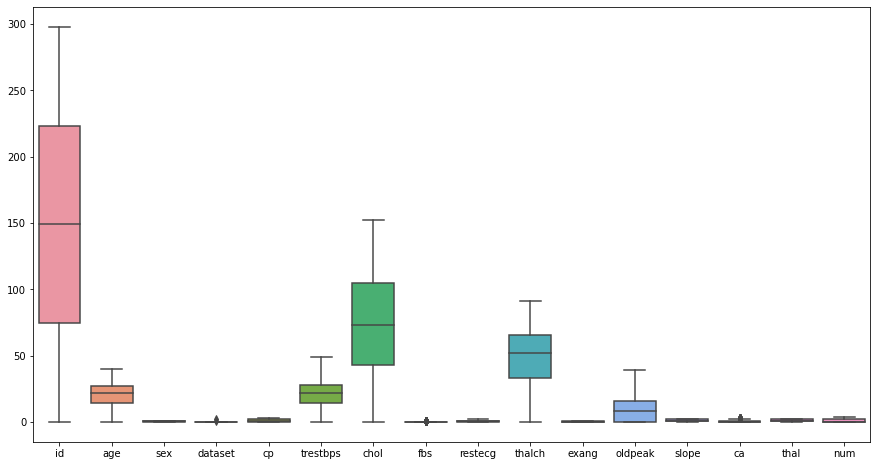

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df);

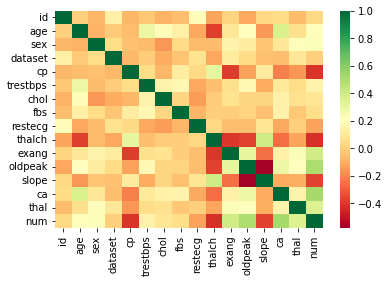

In [13]:
sns.heatmap(df.corr(),cmap='RdYlGn');

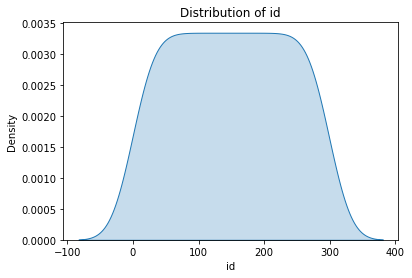

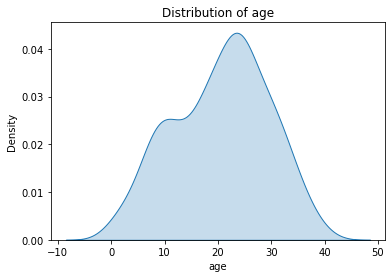

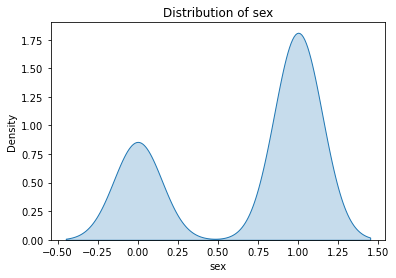

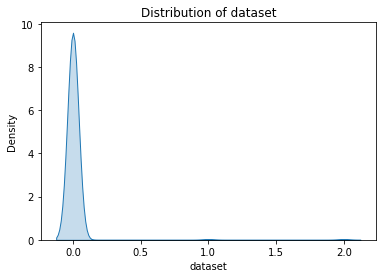

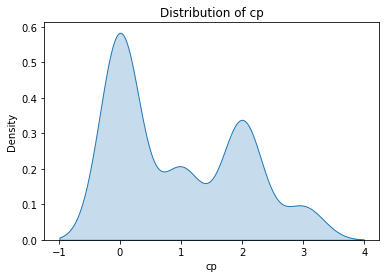

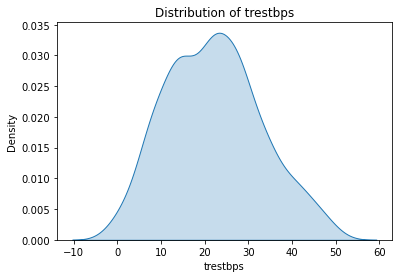

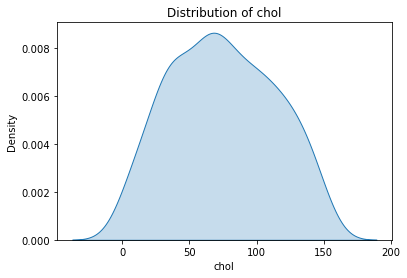

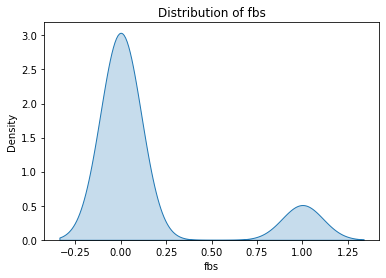

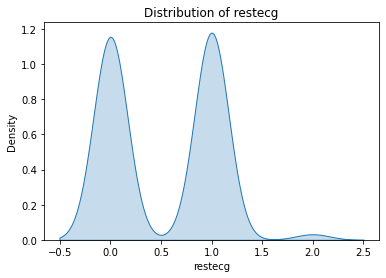

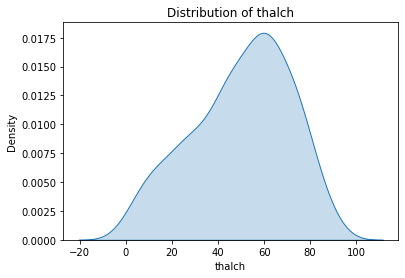

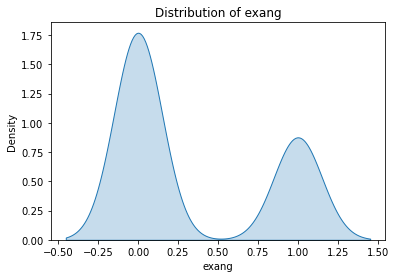

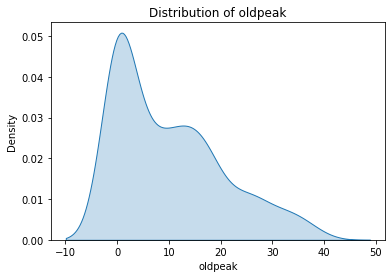

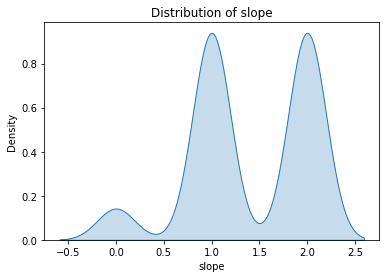

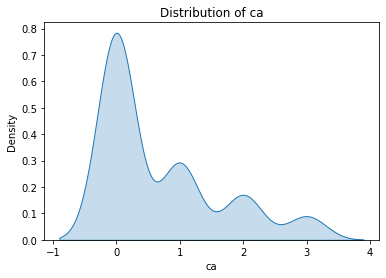

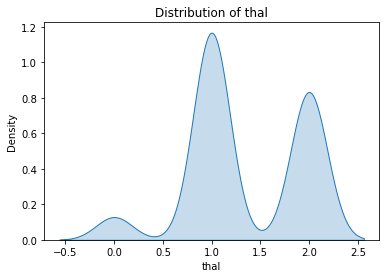

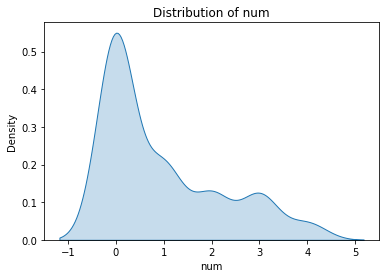

In [14]:
for i in df:
    sns.kdeplot(df[i],shade=True)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

In [15]:
X=df.drop(['num','id'],axis=1)
y=df['num']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Accuracy of Logistic Regression :",accuracy_score(y_test,y_pred))
print("Classification report for Logistic Regression :\n",classification_report(y_test,y_pred))


Accuracy of Logistic Regression : 0.65
Classification report for Logistic Regression :
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.36      0.36      0.36        11
           2       0.00      0.00      0.00         8
           3       0.29      0.67      0.40         3
           4       0.00      0.00      0.00         2

    accuracy                           0.65        60
   macro avg       0.30      0.39      0.33        60
weighted avg       0.59      0.65      0.61        60



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
input_data=(33,0,0,1,14,61,0,0,30,1,25,1,2,2)
#change input data to munpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape 
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
#predict
prediction=model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
    print("Person do not have a heart disease")
else:
    print("Person have a heart disease .")

[4]
Person have a heart disease .


In [33]:
import pickle

In [38]:
file='trained_model.sav'
pickle.dump(model, open(file,'wb'))

TypeError: 'tuple' object is not callable

In [37]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

EOFError: Ran out of input